# *Sentimental Analysis*

## Importing Modules

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
data = pd.read_csv(open("cleaned_hotel_dataset.csv",errors = 'replace',encoding = "UTF-8"))

##  Separate into two groups according to their review ratings : 0(bad) and 1(good)

- I will set the hotels with ratings lower than 4 as 0, else 1.

In [20]:
def sentimental_analyzer(data):
    if( data < 4.0 ) :
        return 0
    else :
        return 1

In [21]:
data['target'] = data['reviews.rating'].apply(lambda x: sentimental_analyzer(x))

In [22]:
data['target'].value_counts()

1    18524
0    10235
Name: target, dtype: int64

## Text Preprocessing by stemming and removing the punctuations

In [23]:
# Stemming

def text_preprocessing(strings):
    ps = PorterStemmer()
    words = word_tokenize(strings)
    res = []
    for i in words:
        if(i in string.punctuation):
            res.append("")
        else:
            
            res.append(ps.stem(i))
            res.append (" ") 
    return "".join(res)

data['reviews.text'] = data['reviews.text'].apply(text_preprocessing)

### Converting the texts to vectors by TfidfVectorizer

In [24]:
# Vectorize the text


tfv = TfidfVectorizer(min_df = 3, max_features = None, strip_accents = 'unicode',analyzer = 'word',ngram_range = (1,3),stop_words = 'english')

In [25]:
vectorized_text = tfv.fit_transform(data['reviews.text'])

### - Getting the train and test sets.

In [26]:
X = vectorized_text
y = data['target']

In [27]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

## Classification Models( MultionomialNB, Logistic Regression and SVM)

### *Multinomial Naive Bayes*
- A type of Naive Bayes classifier which the features are drawn from a multinomial distribution(E.g : word counts of each various words).
- It is suitable for text classification as it classify the data based on the discrete features, such as word of counts.

In [28]:
nbclf = MultinomialNB()
nbclf.fit(X_train,y_train)
pred_nb = nbclf.predict(X_test)
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69      3195
           1       0.79      0.95      0.86      5433

    accuracy                           0.81      8628
   macro avg       0.83      0.76      0.78      8628
weighted avg       0.82      0.81      0.80      8628



Text(0.5, 1, 'Confusion Matrix of Multinomial NB')

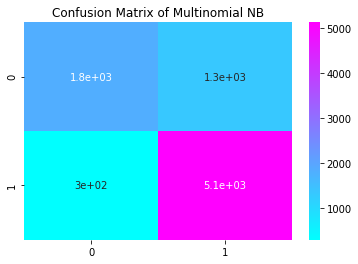

In [29]:
sns.heatmap(confusion_matrix(y_test,pred_nb),cmap='cool',annot = True).set_title('Confusion Matrix of Multinomial NB')

### *Logistic Regression*

- A regression model which predicts the categorical dependent variable by analzing the relationship between one or more independent variables.
- By using logistic function, it determines the the most likelihood estimation.

In [30]:
logistic = LogisticRegression(max_iter = 100,C = 1)
logistic.fit(X_train,y_train)
pred_i = logistic.predict(X_test)
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.83      0.68      0.74      3195
           1       0.83      0.92      0.87      5433

    accuracy                           0.83      8628
   macro avg       0.83      0.80      0.81      8628
weighted avg       0.83      0.83      0.82      8628



Text(0.5, 1, 'Confusion_matrix of Logistic Regression')

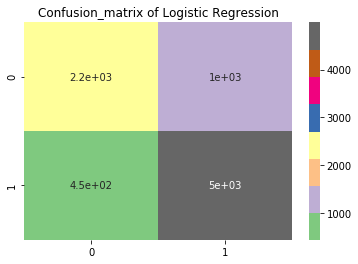

In [31]:
sns.heatmap(confusion_matrix(y_test,pred_i),cmap='Accent',annot = True).set_title('Confusion_matrix of Logistic Regression')

### *Support Vector Machine*

- A classification model which distinctly classify a certain data by separation of data by hyperplane.

In [32]:
svm = SVC(kernel='rbf',C = 10,gamma = 10)
svm.fit(X_train,y_train)
pred_s = svm.predict(X_test)
print(classification_report(y_test,pred_s))

              precision    recall  f1-score   support

           0       0.68      0.06      0.11      3195
           1       0.64      0.98      0.78      5433

    accuracy                           0.64      8628
   macro avg       0.66      0.52      0.44      8628
weighted avg       0.65      0.64      0.53      8628



Text(0.5, 1, 'Confusion_matrix of SVM')

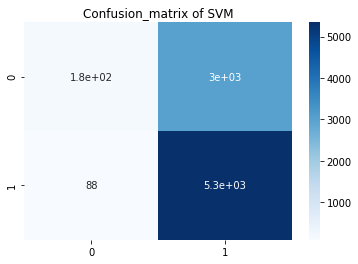

In [33]:
sns.heatmap(confusion_matrix(y_test,pred_s),cmap='Blues',annot = True).set_title('Confusion_matrix of SVM')

### Logistic Regression has the highest accuracy(83%) among the other classifier models. Let's Test the model 

- I will test the model with few sentences containing the words in the previous wordclouds

In [34]:
# Nicely Rated Hotels
print(logistic.predict(tfv.transform(['It was a great hotel with excellent location and views!'])))
                                      
# Poorly Rated Hotels
print(logistic.predict(tfv.transform(['It was a ok hotel. They had poor service and bit dirty rooms. But the views were Great!Overall, it was ok '])))

[1]
[0]


### It has correctly predict the target!

## End Of Sentimental Analysis